
Para este trabalho iremos determinar a chance de sobrevivencia dos individuos com base nas caracteristicas dos passageiros, para isso vamos recorrer a 2 dos modelos mais utilizados em problemas de classificação: Regressão logistica e RandomForest  

In [0]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('titanic(2).csv')


Saving titanic(2).csv to titanic(2) (1).csv


In [0]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [0]:
df.drop([ 'Name'], axis=1, inplace=True)

In [0]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [0]:
#provar a hipotese de mulheres e crianças possuem mais chance de sobrevincia: "primeiro mulheres e crianças"
#analise de sobrevivencia pelo sexo
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.190227


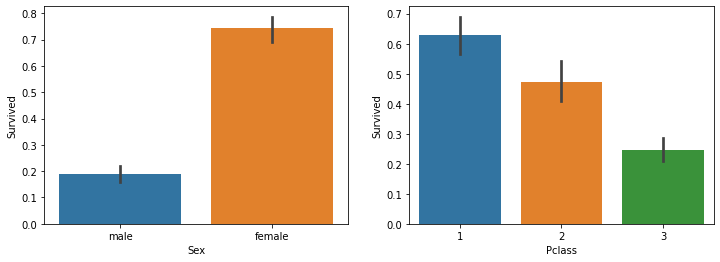

In [0]:
# Plotar os gráficos para Survived vs. Sex e Pclass 


fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=df, ax=axis2)

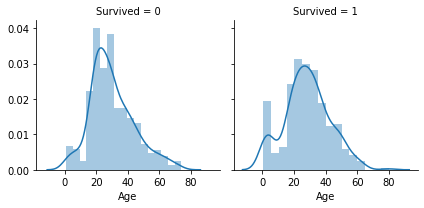

In [0]:
# influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(df, col='Survived')
age_survived.map(sns.distplot, 'Age')


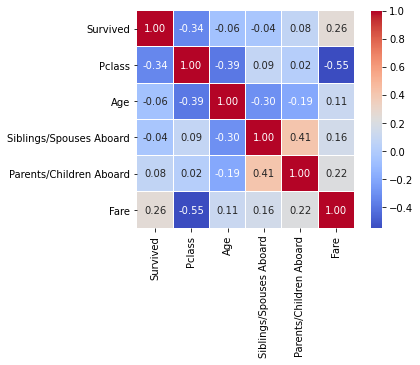

In [0]:

#heatmap (correlação das variáveis)
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [0]:

d = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(d)


In [0]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [0]:
#Separa as bases de treino e teste
features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]

X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [0]:

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
print(f"Acurácia sem o Grid Search: {round(metrics.accuracy_score(y_test, y_pred) * 100, 2)}%")




Acurácia sem o Grid Search: 80.52%


In [0]:


from sklearn.model_selection import GridSearchCV
param_grid = { 
     'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
     'max_features': ['log2', 'sqrt', 'log'],
     'max_depth' : [5, 10, 50, 100, None]
 }
rfc=RandomForestClassifier(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, verbose=0, n_jobs=4)
CV_rfc.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
print(f"Acurácia com o Grid Search: {round(metrics.accuracy_score(y_test, y_pred) * 100, 2)}%")


Acurácia com o Grid Search: 80.52%


In [0]:

# extrair coluna 'Survived' e excluir ela do dataset treino
target = df.Survived.copy()
df.drop(['Survived'], axis=1, inplace=True)

# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(df, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.38


Conforme os resultados dos modelos vimos uma diferença pequena em relação a perfomance da acuracidade, sendo o modelo de regressão logistica 0,14% pior que o modelo de RandomForest, este sendo a escolha preferida pelo grupo para a aplicação em produção. 
É importante notar que o modelo de RandomForest levou mais tempo para ser executado que o de Regressão Logistica no ambiente do Google Colab e caso fosse necessário implantar  o modelo em uma situação onde o tempo para tomar uma decisão é critico, o modelo de Regressão poderia ser utilizado, apesar da maior chance de ele causar um overfitting do modelo.  